# 융합전자공학부 2015003654 이호영 HW 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

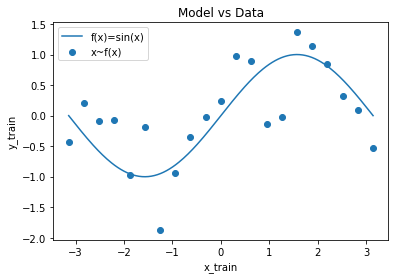

In [2]:
x = np.linspace(-1*np.pi,np.pi,200)
y = np.sin(x)
x_train = np.linspace(-1*np.pi,np.pi,21)
y_train = np.sin(x_train)+ np.random.normal(0,0.5,21)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Model vs Data')
plt.plot(x,y,label='f(x)=sin(x)')
plt.scatter(x_train,y_train,label='x~f(x)')
plt.legend()
plt.show()

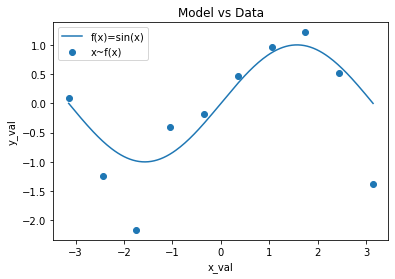

In [3]:
x_val = np.linspace(-1*np.pi,np.pi,10)
y_val = np.sin(x_val)+ np.random.normal(0,0.5,10)
plt.xlabel('x_val')
plt.ylabel('y_val')
plt.title('Model vs Data')
plt.plot(x,y,label='f(x)=sin(x)')
plt.scatter(x_val,y_val,label='x~f(x)')
plt.legend()
plt.show()

In [4]:
# MSE 함수
# y_pred가 2차원 배열이기 때문에 reshpae(-1)로 1차원으로 바꾼다.
def MSE(y_pred, y):
    return np.mean((y_pred.reshape(-1) - y) ** 2)

In [5]:
# Xw = y_pred에서 2차원 배열 X를 초기화하기 위한 함수
def initArray(arr, degree):    
    initArr = np.zeros((arr.shape[0], degree + 1))
    for deg in range(degree + 1):
        initArr[:, deg] = arr ** deg
    return initArr

In [6]:
# (X_transpose @ X)w_ols = (X_transpose @ y_pred)를 풀어서 w_ols를 구함
# X와 w_ols를 곱해서 y_pred를 구함
def polyRegression(X,y):
    A = np.dot(X.T,X)
    b = np.dot(X.T,y.reshape(-1,1))
    weight = (np.linalg.inv(A).dot(b)).reshape(-1,1)
    y_pred = X.dot(weight)
    return weight, y_pred

# First Idea(Polyfit)

numpy의 polyfit 함수를 사용해서 fitting을 실시하였습니다.fitting 자체는 괜찮게 되고 함수도 매끄러워서 괜찮았습니다.
하지만 MSE를 구할 때 validation data에서 degree가 높을 때 overfitting이 일어나지 않았습니다. 그리고 degree가 9일 때는 data 모두를 지나서 MSE가 매우 작았고 원하는 그래프가 나오지 않았습니다.
수업 시간 도중 Matrix를 이용해보라고 교수님이 말씀해주셔서 Idea 2를 생각해보았습니다.

### Train data

 
0.02235
 
0.1712 x + 0.02235
          2
-0.01669 x + 0.1712 x + 0.08275
          3           2
-0.08158 x - 0.01669 x + 0.701 x + 0.08275
          4           3          2
-0.01265 x - 0.08158 x + 0.1001 x + 0.701 x - 0.04273
         5           4          3          2
0.01001 x - 0.01265 x - 0.2007 x + 0.1001 x + 0.9735 x - 0.04273
           6           5        4          3          2
-0.009154 x + 0.01001 x + 0.12 x - 0.2007 x - 0.3681 x + 0.9735 x + 0.1926
          7            6           5        4           3          2
0.001789 x - 0.009154 x - 0.02041 x + 0.12 x - 0.05564 x - 0.3681 x + 0.805 x + 0.1926
          8            7           6           5          4           3
0.003436 x + 0.001789 x - 0.07594 x - 0.02041 x + 0.5196 x - 0.05564 x
          2
 - 1.119 x + 0.805 x + 0.4073
           9            8             7           6            5
9.907e-05 x + 0.003436 x - 0.0003676 x - 0.07594 x - 0.004959 x
           4           3         2
 + 0.5196 x - 0.09604 x

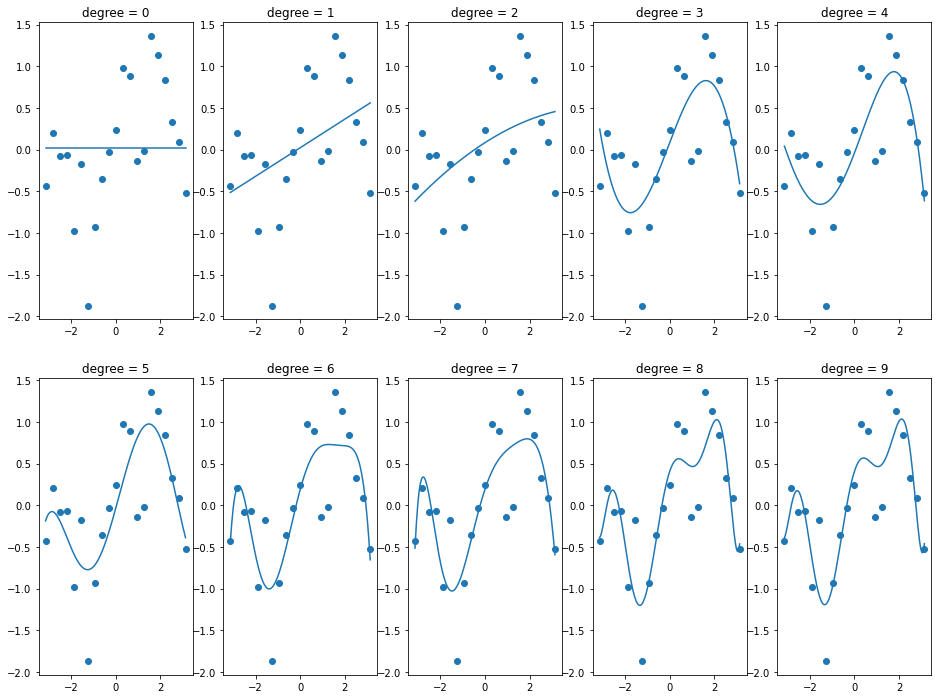

In [14]:
plt.figure(figsize=(16,12))
num = 1
MSE_train_poly = []
z_p = np.linspace(-1*np.pi,np.pi,200)
for deg in range(10):
    plt.subplot(2,5,num)
    z= np.polyfit(x_train,y_train,deg)
    p = np.poly1d(z)
    print(p)
    MSE_train_poly.append(MSE(p(x_train),y_train))
    plt.title(f'degree = {deg}')
    plt.scatter(x_train,y_train)
    plt.plot(z_p,p(z_p))
    num += 1
plt.show()

### Validation data

 
-0.211
 
0.181 x - 0.211
          2
-0.08531 x + 0.181 x + 0.1321
         3           2
-0.1455 x - 0.08531 x + 1.22 x + 0.1321
          4          3          2
0.009857 x - 0.1455 x - 0.1838 x + 1.22 x + 0.2451
           5            4           3          2
-0.008687 x + 0.009857 x - 0.03616 x - 0.1838 x + 0.9594 x + 0.2451
           6            5           4           3          2
-0.002564 x - 0.008687 x + 0.04806 x - 0.03616 x - 0.3199 x + 0.9594 x + 0.3129
          7            6          5           4          3          2
0.007234 x - 0.002564 x - 0.1307 x + 0.04806 x + 0.5266 x - 0.3199 x + 0.3416 x + 0.3129
           8            7          6          5          4          3
-0.005872 x + 0.007234 x + 0.1056 x - 0.1307 x - 0.5454 x + 0.5266 x
           2
 + 0.6683 x + 0.3416 x + 0.07034
          9            8           7          6          5          4
0.004989 x - 0.005872 x - 0.09016 x + 0.1056 x + 0.4661 x - 0.5454 x
           3          2
 - 0.7402 x + 0.66

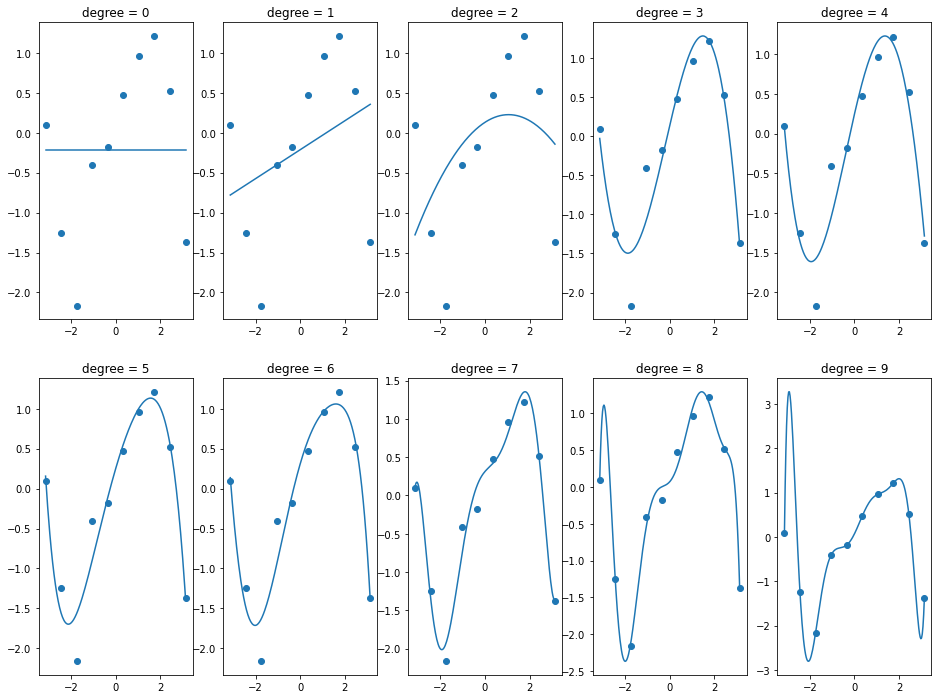

In [10]:
plt.figure(figsize=(16,12))
num = 1
MSE_val_poly = []
z_p = np.linspace(-1*np.pi,np.pi,200)
for deg in range(10):
    plt.subplot(2,5,num)
    z= np.polyfit(x_val,y_val,deg)
    p = np.poly1d(z)
    print(p)
    MSE_val_poly.append(MSE(p(x_val),y_val))
    plt.title(f'degree = {deg}')
    plt.scatter(x_val,y_val)
    plt.plot(z_p,p(z_p))
    num += 1
plt.show()

log(MSE)와 deg간의 관계를 나타낸 그래프, degree 9일 때 MSE가 너무 작아서 degree 8까지만 나타냄

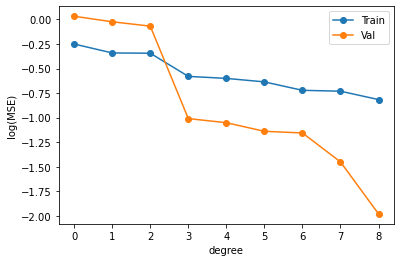

In [11]:
degree = [i for i in range(9)]
plt.xlabel('degree')
plt.ylabel('log(MSE)')
plt.plot(degree,np.log10(MSE_train_poly[:-1]),marker='o',label='Train')
plt.plot(degree,np.log10(MSE_val_poly[:-1]),marker='o',label='Val')
plt.legend()

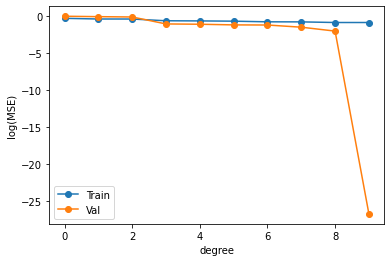

In [16]:
degree = [i for i in range(10)]
plt.xlabel('degree')
plt.ylabel('log(MSE)')
plt.plot(degree,np.log10(MSE_train_poly),marker='o',label='Train')
plt.plot(degree,np.log10(MSE_val_poly),marker='o',label='Val')
plt.legend()

# Second Idea(Matrix multiplication)

Matrix multiplication을 사용했을 때는 fitting에서 각이 진 부분이 생겼지만
MSE 부분에서 validation 부분은 overfitting이 발생해서 MSE가 증가하는 구간이 생겼고
train 부분에서는 계속 감소하는 그래프 모양을 보였습니다.

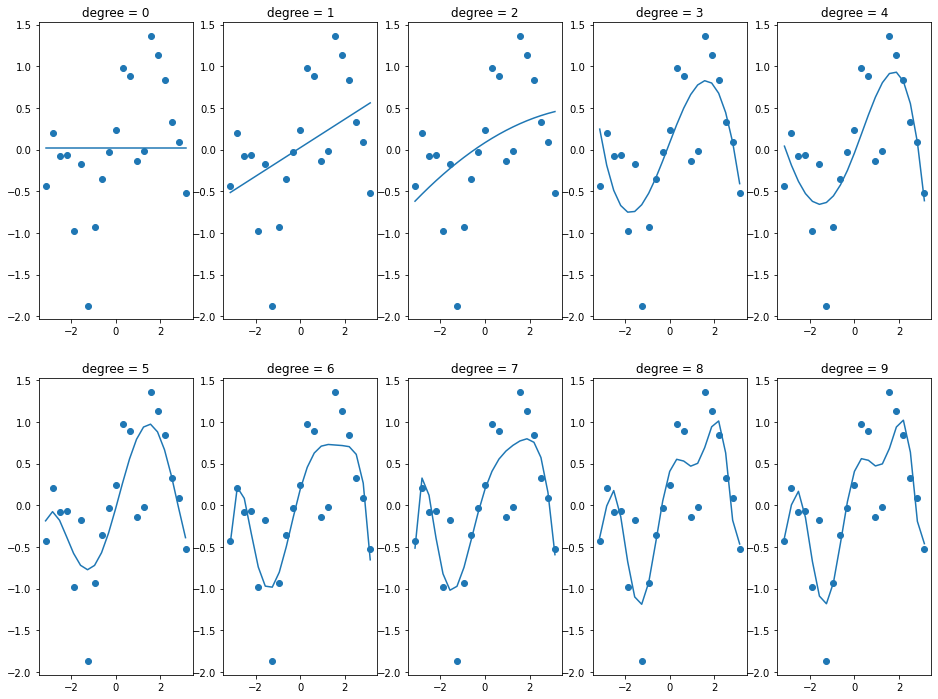

In [12]:
plt.figure(figsize=(16,12))
num = 1
MSE_train = []
MSE_val  = []

for degree in range(10):

    X_train = initArray(x_train, degree)
    weight, y_train_pred = polyRegression(X_train, y_train)
    X_val = initArray(x_val, degree)
    y_val_pred = X_val.dot(weight)
    
    MSE_train.append(MSE(y_train_pred, y_train))
    MSE_val.append(MSE(y_val_pred, y_val))

    plt.subplot(2,5,num)
    plt.title(f'degree = {degree}')
    plt.scatter(x_train,y_train)
    plt.plot(x_train,y_train_pred)
    num += 1

plt.show()

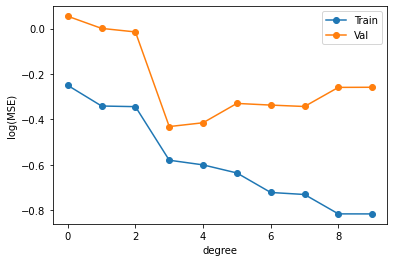

In [13]:
degree = [i for i in range(10)]
plt.xlabel('degree')
plt.ylabel('log(MSE)')
plt.plot(degree,np.log10(MSE_train),marker='o',label='Train')
plt.plot(degree,np.log10(MSE_val),marker='o',label='Val')
plt.legend()